# Regressão Linear com Dataset de Saúde
Este notebook realiza uma análise de regressão linear utilizando dados do dataset de saúde.
Ele explora a relação entre despesas totais de saúde e um indicador de cobertura.

In [5]:
# Importar bibliotecas necessárias
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Configurações de exibição
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 9)

In [6]:
# Carregar o dataset
dataset_path = '../datasets/br_ieps_saude_uf.csv'
saude = pd.read_csv(dataset_path)

#Limpeza do dataset para a realização da regressão linear
# Identificar colunas financeiras (aquelas que contêm "desp" ou "gasto" no nome)
colunas_financeiras = [col for col in saude.columns if 'desp' in col or 'gasto' in col]

# Substituir valores ausentes nas colunas financeiras pela mediana
saude[colunas_financeiras] = saude[colunas_financeiras].apply(lambda x: x.fillna(x.median()))

# Substituir valores ausentes nas demais colunas
for col in saude.columns:
    if saude[col].dtype in ['float64', 'int64']:
        saude[col].fillna(saude[col].mean(), inplace=True)  # Média para colunas numéricas
    else:
        saude[col].fillna(saude[col].mode()[0], inplace=True)  # Moda para colunas categóricas

# Salvar o dataset limpo
saude.to_csv('../datasets/uf_limporeg.csv', index=False)



# Exibir informações iniciais
print(saude.head())

    ano sigla_uf     cob_ab    cob_acs    cob_esf  cob_vac_bcg  cob_vac_rota  \
0  2010       AC  75.558215  87.753425  64.064896        100.0     66.749718   
1  2010       AL  78.580644  77.051768  72.961540        100.0     74.794916   
2  2010       AM  65.216161  69.136690  50.478242        100.0     58.681194   
3  2010       AP  90.042754  89.235233  73.277913        100.0     73.531058   
4  2010       BA  66.063220  82.518806  59.840187        100.0     72.142332   

   cob_vac_menin  cob_vac_pneumo  cob_vac_polio  ...  desp_recp_saude_pc_mun  \
0       0.652842        4.864448     100.000000  ...              114.166340   
1       3.434813        6.652844     100.000000  ...              124.854673   
2       2.051782        7.585714      92.480398  ...              163.538580   
3       0.395436        4.546726      90.752658  ...              111.239863   
4      64.723803        2.831480      95.929891  ...              120.605392   

   pct_desp_recp_saude_uf  desp_tot_sa

/tmp/ipykernel_8773/4024729.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  saude[col].fillna(saude[col].mean(), inplace=True)  # Média para colunas numéricas
/tmp/ipykernel_8773/4024729.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

## Distribuição das Variaveis
Antes de iniciar as regressão, vamos mostrar como estão distribuidas as variaveis analizadas aqui.

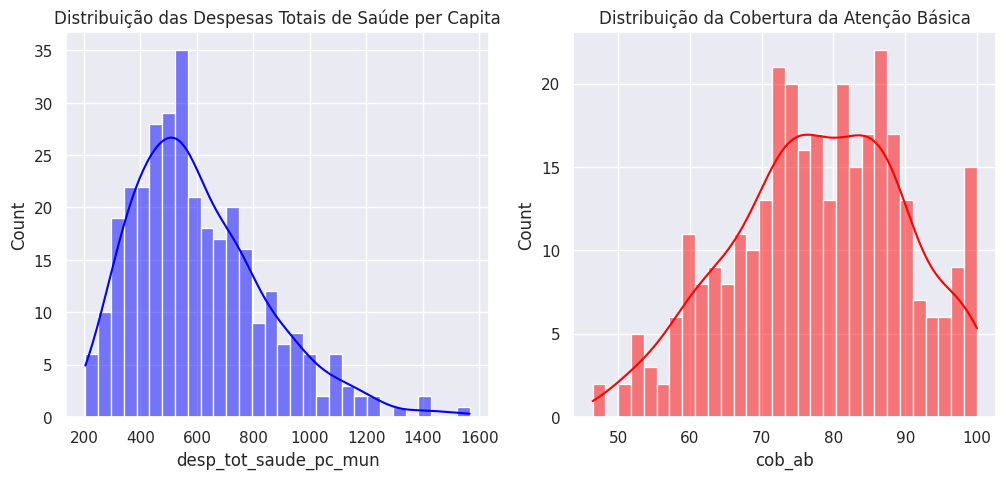

In [12]:
# Histograma das variáveis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(saude['desp_tot_saude_pc_mun'], bins=30, kde=True, color='blue')
plt.title('Distribuição das Despesas Totais de Saúde per Capita')

plt.subplot(1, 2, 2)
sns.histplot(saude['cob_ab'], bins=30, kde=True, color='red')
plt.title('Distribuição da Cobertura da Atenção Básica')

plt.show()

## Regressão Linear
Primeiramente, vamos usar uma regressão linear para explorar a relação entre as despesas totais de saúde per capita e a cobertura da atenção básica.

In [48]:
# Selecionar variáveis para regressão
X = saude['desp_tot_saude_pc_mun'].values.reshape(-1, 1)  # Variável independente
y = saude['cob_ab'].values.reshape(-1, 1)  # Variável dependente

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

# Fazer previsões
y_pred = lin_regr.predict(X_test)

# Exibir coeficientes e métricas
print(f'Coeficiente: {lin_regr.coef_[0][0]:.2f}')
print(f'Intercepto: {lin_regr.intercept_[0]:.2f}')
print(f'Erro Quadrático Médio: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

Coeficiente: 0.01
Intercepto: 74.76
Erro Quadrático Médio: 152.87
R²: 0.00


## Visualização da Regressão Linear
O gráfico abaixo mostra a linha de regressão e os pontos de dados.

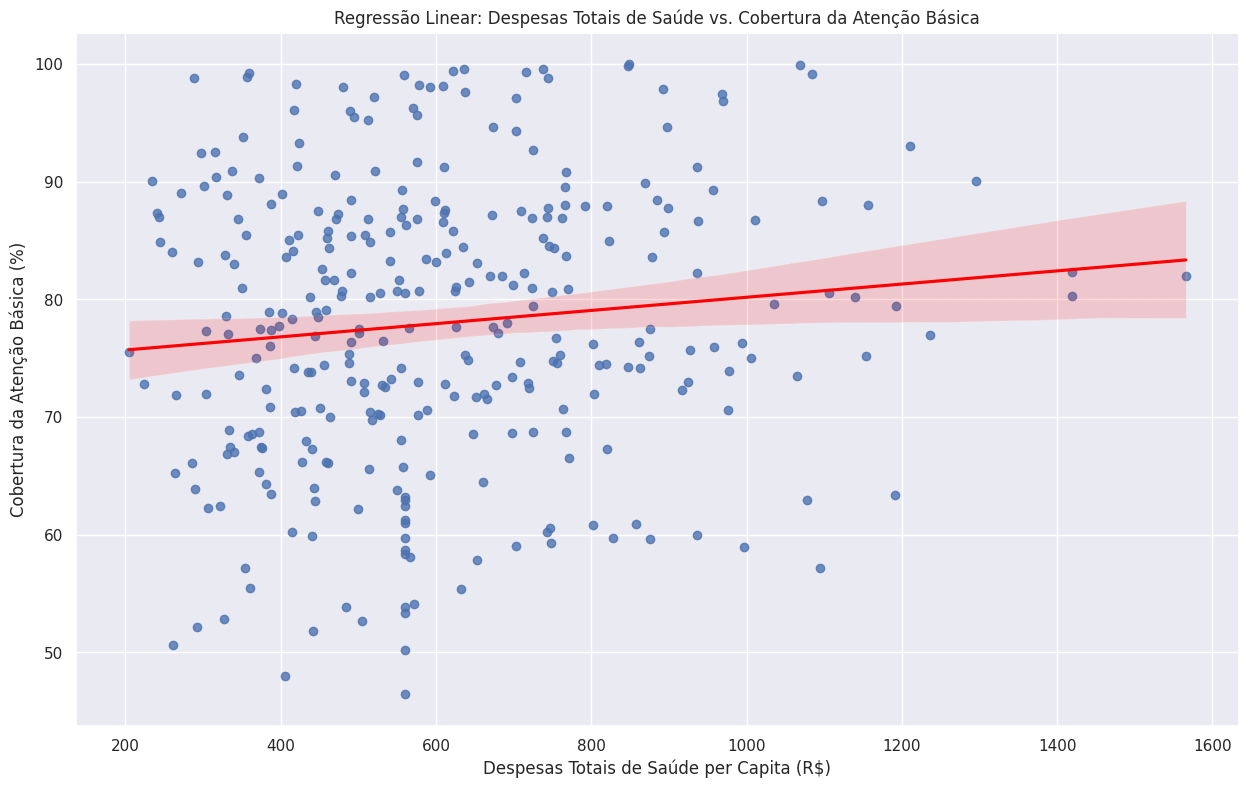

In [62]:
# Plotar a regressão linear
sns.regplot(x='desp_tot_saude_pc_mun', y='cob_ab', data=saude, line_kws={'color': 'red'})
plt.title('Regressão Linear: Despesas Totais de Saúde vs. Cobertura da Atenção Básica')
plt.xlabel('Despesas Totais de Saúde per Capita (R$)')
plt.ylabel('Cobertura da Atenção Básica (%)')
plt.show()

## Regressão Polinomial
Para efeito de comparação, resolvemos fazer uma regressão polinomial, de modo que possamos tentar entender o grafico e realizar uma previsão sobre os seus dados

Abaixo estão a implementação da regressão e sua plotagem em um grafico.

Coeficientes: [ 0.          8.6179158  -0.38845024]
Intercepto: 39.21
Erro Quadrático Médio: 155.23
R²: -0.01


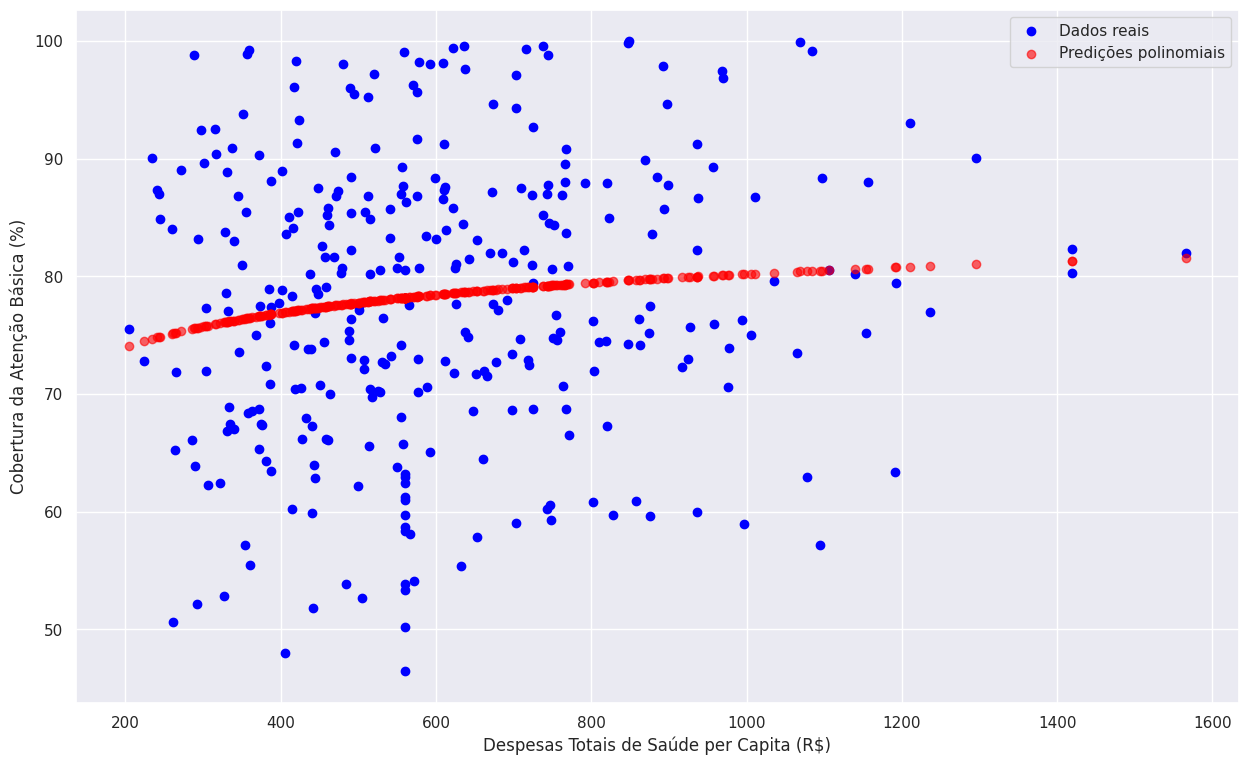

In [63]:
from sklearn.preprocessing import PolynomialFeatures

# Criar uma transformação logarítmica apenas para o treinamento
saude['desp_tot_saude_pc_mun_log'] = np.log1p(saude['desp_tot_saude_pc_mun'])

# Selecionar variáveis
X_real = saude['desp_tot_saude_pc_mun'].values.reshape(-1, 1)  # Para exibição no gráfico
X = saude['desp_tot_saude_pc_mun_log'].values.reshape(-1, 1)  # Para o modelo
y = saude['cob_ab'].values.reshape(-1, 1)

# Criar características polinomiais de grau 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão polinomial
lin_regr_poly = LinearRegression()
lin_regr_poly.fit(X_train, y_train)

# Fazer previsões
y_pred_poly = lin_regr_poly.predict(X_test)

# Exibir coeficientes e métricas
print(f'Coeficientes: {lin_regr_poly.coef_.flatten()}')  # Lista de coeficientes do modelo
print(f'Intercepto: {lin_regr_poly.intercept_[0]:.2f}')
print(f'Erro Quadrático Médio: {mean_squared_error(y_test, y_pred_poly):.2f}')
print(f'R²: {r2_score(y_test, y_pred_poly):.2f}')

# Fazer previsões no conjunto completo para visualização
y_pred_plot = lin_regr_poly.predict(X_poly)

# Plotar os resultados com os valores reais no eixo X
plt.scatter(X_real, y, color='blue', label='Dados reais')
plt.scatter(X_real, y_pred_plot, color='red', label='Predições polinomiais', alpha=0.6)
plt.xlabel('Despesas Totais de Saúde per Capita (R$)')
plt.ylabel('Cobertura da Atenção Básica (%)')
plt.legend()
plt.show()
